
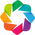

Loading BokehJS ...

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
hv.extension('bokeh')

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

# Style
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")

output_notebook()

# Query 1 - Percentage of canceled flights per day

In [2]:
# Load data from csv
canceled_df = pd.read_csv('query1.csv/part-00000-52553417-36e9-4c25-b381-2f5ee8d6c911-c000.csv', parse_dates=False)
canceled_df.head()

,Year,Month,DayofMonth,percentageCancelled
0,1994,1,1,0.005264
1,1994,1,2,0.004492
2,1994,1,3,0.015418
3,1994,1,4,0.155609
4,1994,1,5,0.047656


In [3]:
# Build datetimes from Year, Month, Day columns
canceled_df.rename(columns={'DayofMonth': 'Day'}, inplace=True)
dates = pd.to_datetime(canceled_df[['Year', 'Month', 'Day']])

# Add Date to the original DataFrame
canceled_df = canceled_df.assign(Date=dates)

# Set Date as the new index column
canceled_df.set_index('Date', inplace=True)
canceled_df.head()

,Year,Month,Day,percentageCancelled
Date,,,,
1994-01-01,1994,1,1,0.005264
1994-01-02,1994,1,2,0.004492
1994-01-03,1994,1,3,0.015418
1994-01-04,1994,1,4,0.155609
1994-01-05,1994,1,5,0.047656


### Percentage of canceled flights per day

In [4]:
# Create the plot figure
p = figure(plot_width=900, plot_height=400,
           title="Percentage of canceled flights per day", x_axis_type='datetime')

# Load the Dataframe as Bokeh DataSource
source = ColumnDataSource(canceled_df)

# Add a line plot
p.line('Date', 'percentageCancelled', source=source)
p.y_range.start = 0

# Labels
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Percentage of canceled flights"

show(p)

### Percentage of canceled flights aggregated per year

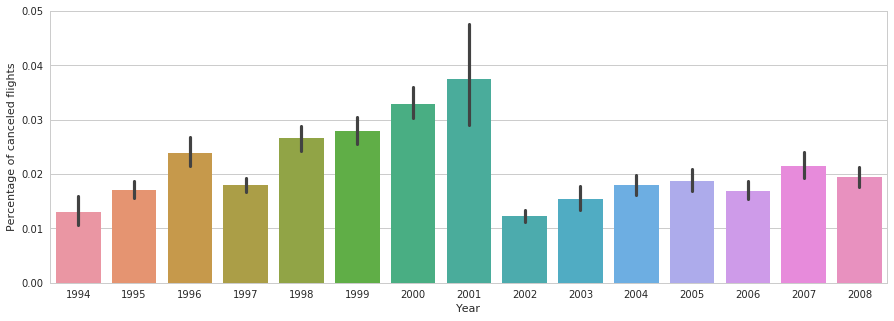

In [5]:
# Drop columns we don't need
yearly_df = canceled_df.drop(columns=['Month', 'Day'])

# Create the plot
ax = sns.barplot(x="Year", y="percentageCancelled", data=yearly_df);

# Labels
ax.set_ylabel("Percentage of canceled flights")

plt.show()

### Percentage of canceled flights aggregated per month (2001)

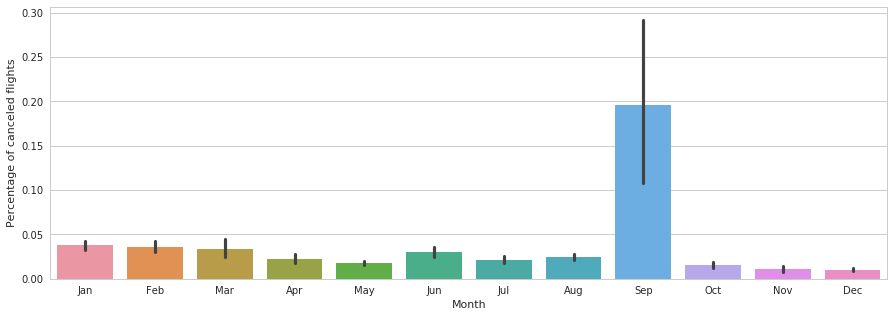

In [6]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Select a single year
year_df = canceled_df.loc[canceled_df['Year'] == 2001]

# Drop columns we don't need
year_df = year_df.drop(columns=['Year', 'Day'])

# Create the plot
ax = sns.barplot(x="Month", y="percentageCancelled", data=year_df);

# Labels
ax.set_xticklabels(months)
ax.set_ylabel("Percentage of canceled flights")

plt.show()

### Percentage of canceled flights aggregated per month (2002)

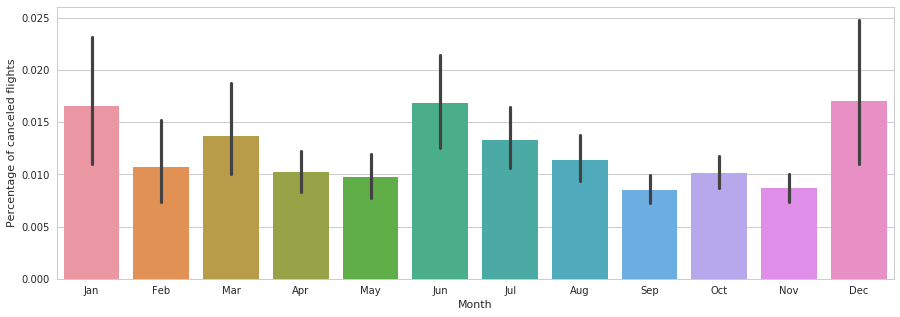

In [7]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Select a single year
year_df = canceled_df.loc[canceled_df['Year'] == 2002]

# Drop columns we don't need
year_df = year_df.drop(columns=['Year', 'Day'])

# Create the plot
ax = sns.barplot(x="Month", y="percentageCancelled", data=year_df);

# Labels
ax.set_xticklabels(months)
ax.set_ylabel("Percentage of canceled flights")

plt.show()

### Percentage of canceled flights aggregated per month (1994/1995/1996)

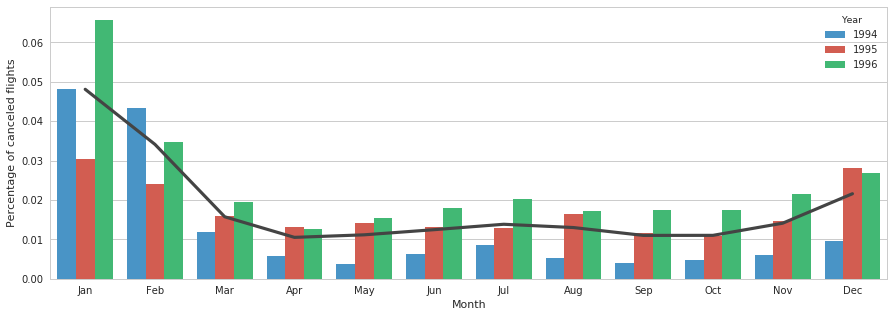

In [8]:
# Vars
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ["#3498db", "#e74c3c", "#2ecc71"]

# Select a single year
year_df = canceled_df.loc[canceled_df.Year.isin([1994, 1995, 1996])]

# Drop columns we don't need
year_df = year_df.drop(columns=['Day'])


# Pointplot
pt = sns.pointplot(x="Month", y="percentageCancelled", data=year_df,
              ci=None, markers="", color="#444444");

# Barplot
ax = sns.barplot(x="Month", y="percentageCancelled", hue="Year",
                 data=year_df, ci=None, palette=sns.color_palette(colors));

# Baroplot Labels
ax.set_xticklabels(months)
ax.set_ylabel("Percentage of canceled flights")

plt.show()

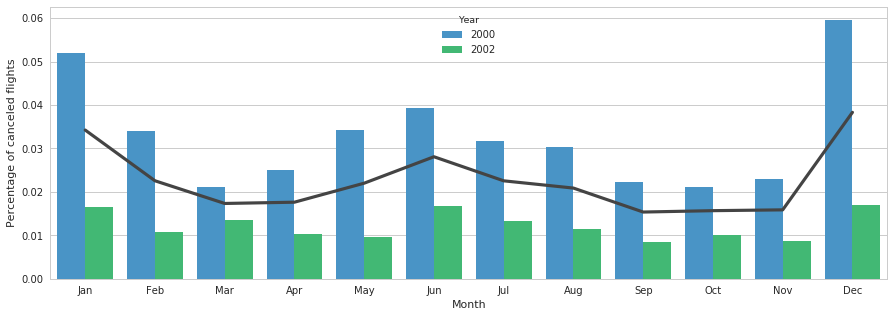

In [9]:
# Vars
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ["#3498db", "#2ecc71"]

# Select a single year
year_df = canceled_df.loc[canceled_df.Year.isin([2000, 2002])]

# Drop columns we don't need
year_df = year_df.drop(columns=['Day'])

# Pointplot
sns.pointplot(x="Month", y="percentageCancelled", data=year_df,
              ci=None,color="#444444", markers="", );

# Barplot
ax = sns.barplot(x="Month", y="percentageCancelled", hue="Year",
                 data=year_df, ci=None, palette=sns.color_palette(colors));

# Barplot Labels
ax.set_xticklabels(months)
ax.set_ylabel("Percentage of canceled flights")

plt.show()

# Query 2 - Weekly percentages of delays that are due to weather

In [10]:
# Load data from csv
weather_canceled_df = pd.read_csv('query2.csv/part-00000-3db66a5e-a01b-43d3-9add-f20f2c518f9b-c000.csv',
                                  parse_dates=False, dtype={'week':'int'})
weather_canceled_df.head()

,Year,week,percentage
0,2003,22,0.109589
1,2003,23,0.147023
2,2003,24,0.299003
3,2003,25,0.135690
4,2003,26,0.105898


### Percentage of canceled flights due to weather, aggregated per year

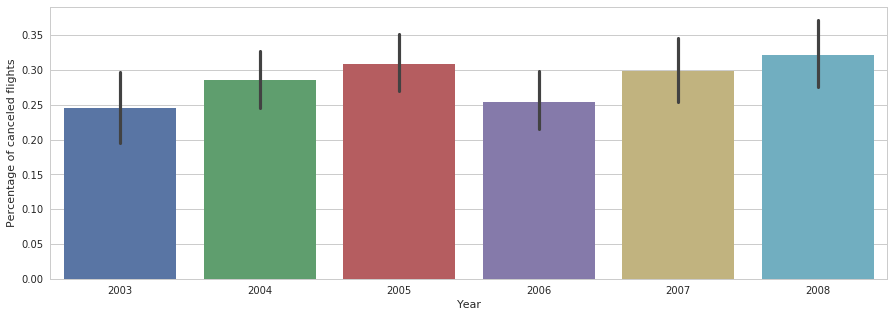

In [11]:
# Drop columns we don't need
weather_year_df = weather_canceled_df.drop(columns=['week'])

# Create the plot
ax = sns.barplot(x="Year", y="percentage", data=weather_year_df);

# Labels
ax.set_ylabel("Percentage of canceled flights")

plt.show()

### Percentage of canceled flights due to weather, aggregated per week for one year

In [12]:
# # Hover and Tick Labels
# from bokeh.models.tools import HoverTool
# from bokeh.models import FuncTickFormatter

# # Widgets
# from bokeh.layouts import widgetbox
# from bokeh.models.widgets import Button, RadioButtonGroup, Select, Slider

In [15]:
# # Vars
# colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# year = 2004
# i=2

# # Create the plot figure
# p = figure(plot_width=900, plot_height=400, x_axis_type='datetime',
#            title="Percentage of canceled flights due to weather ({})".format(year))

# # Select a single year
# weather_canceled_df_year = weather_canceled_df.loc[weather_canceled_df['Year'] == year]

# # Load the Dataframe as Bokeh DataSource
# source = ColumnDataSource(weather_canceled_df_year)

# # Add a line plot
# p.line('week', 'percentage', source=source, color=colors[i])
# # Add points to the line plot
# p.circle('week', 'percentage', source=source, color=colors[i])

# # Set start and end range for axes
# p.y_range.start = 0
# p.x_range.start = 1
# p.x_range.end = 53

# # Labels
# p.xaxis.axis_label = "Week"
# p.yaxis.axis_label = "Percentage of canceled flights"

# # Hack to display week numbers correctly. Without this Bokeh will
# # put 'ms' after the number of the week
# label_dict = {}
# for i in range(1, 54):
#     label_dict[i] = i

# p.xaxis.formatter = FuncTickFormatter(code="""
#     var labels = %s;
#     return labels[tick];
# """ % label_dict)

# # Add markerks to highlight the hovering
# cr = p.circle('week', 'percentage', source=source, size=20,
#               fill_color="grey", hover_fill_color=colors[3],
#               fill_alpha=0, hover_alpha=0.5,
#               line_color=None, hover_line_color="white")

# # Add hover tooltips
# p.add_tools(HoverTool(tooltips=[("%", "@percentage"), ("week", "@week")], renderers=[cr], mode='vline'))

# show(p)

In [16]:
from bokeh.models.tools import HoverTool

In [30]:
# Create the Holoviews Dataset starting from the DataFrame
weather_canceled_df.loc['percentage'] = weather_canceled_df['percentage'].astype(np.float64)
vdims = [('percentage', 'Percentage of canceled flights')]
ds = hv.Dataset(weather_canceled_df, [('week', 'Week'), 'Year'], vdims)

# Create the Hover Tool
hover = HoverTool(tooltips=[("%", "@percentage"), ("week", "@week")], mode='vline')

# Vars
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
i=2

In [32]:
%%opts Curve [width=700 height=400 show_grid=True title_format="Percentage of canceled flights due to weather"]
%%opts Curve (color=colors[i] line_width=1)
%%opts Scatter (color=colors[i] size=5)
%%opts Scatter.Hover [tools=[hover]]
%%opts Scatter.Hover (size=20 color=colors[3] alpha=0 hover_alpha=0.5)

# Create Curve and Scatter plots
curve = ds.to(hv.Curve, 'week', 'percentage')
scatter = ds.to(hv.Scatter, 'week', 'percentage', group='Normal')
scatter_hover = ds.to(hv.Scatter, 'week', 'percentage', group='Hover')

# Merge and display
curve * scatter * scatter_hover

:HoloMap   [Year]
   :Overlay
      .Curve.I  :Curve   [week]   (percentage)
      .Normal.I :Scatter   [week]   (percentage)
      .Hover.I  :Scatter   [week]   (percentage)

# Query 3 - Distance groups

In [19]:
# Load data from csv
distgroup_df = pd.read_csv('query4.csv/part-00000-c21ca3aa-6add-4c43-b305-ace27b79e91e-c000.csv', parse_dates=False)
distgroup_df.head()

,DistanceGroup,percentage
0,1,0.564484
1,2,0.552450
2,3,0.542318
3,4,0.545431
4,5,0.547017


### Percentage of flights belonging to a given "distance group" that were able to halve their departure delays

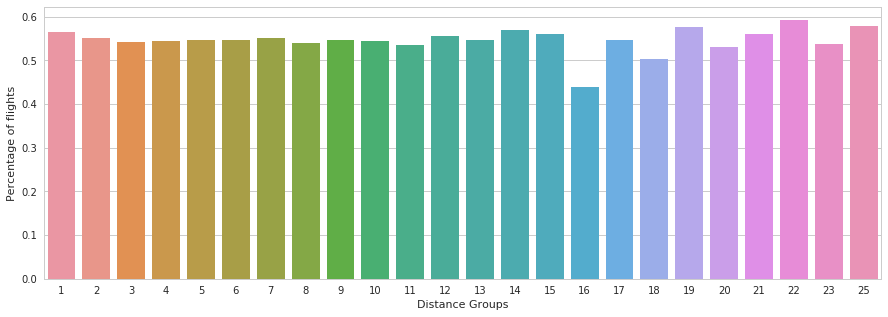

In [20]:
# Create the plot
ax = sns.barplot(x="DistanceGroup", y="percentage", data=distgroup_df);

# Labels
ax.set_ylabel("Percentage of flights")
ax.set_xlabel("Distance Groups")

plt.show()

### Airports on map

In [ ]:
from bokeh.models import WMTSTileSource

In [ ]:
# web mercator coordinates
USA = x_range,y_range = ((-13884029,-7453304), (2698291,6455972))

p = figure(tools='pan, wheel_zoom', x_range=x_range, y_range=y_range)
p.axis.visible = False


In [ ]:
url = 'http://a.basemaps.cartocdn.com/dark_all/{Z}/{X}/{Y}.png'
#url = 'http://a.basemaps.cartocdn.com/dark_all/{Z}/{X}/{Y}.png'
# https://github.com/CartoDB/cartodb/wiki/BaseMaps-available
# http://{s}.api.cartocdn.com/{basemap_id}/{z}/{x}/{y}.png
attribution = "Tiles by Carto, under CC BY 3.0. Data by OSM, under ODbL"

p.add_tile(WMTSTileSource(url=url, attribution=attribution))
show(p)